# Week 09 Instructor-led Lab: Statistics in Python

Author: Hali Evans    
Course: BGEN632    
Purpose: Implement statistical approaches in Python using datsets created in Week 7 Independent Lab.

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [7]:
# set working directory
os.chdir("/Users/halievans/Documents/BGEN632/week9labs/data")  # add your filepath within the quotes
os.getcwd()  # confirm change

'/Users/halievans/Documents/BGEN632/week9labs/data'

In [8]:
# load data
chd_df = pd.read_csv("CaliforniaHospitalData.csv")
chd_df.info()  # quick inspect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB


In [9]:
# load data
chdp_df = pd.read_csv("CaliforniaHospitalData_Personnel.txt", sep="\t")
chdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HospitalID     64 non-null     int64 
 1   Work_ID        64 non-null     int64 
 2   LastName       64 non-null     object
 3   FirstName      64 non-null     object
 4   Gender         64 non-null     object
 5   PositionID     64 non-null     int64 
 6   PositionTitle  64 non-null     object
 7   Compensation   64 non-null     int64 
 8   MaxTerm        64 non-null     int64 
 9   StartDate      64 non-null     object
 10  Phone          64 non-null     object
 11  Email          64 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB


## Prep Data and Add A New Record

In [11]:
# merge data
merged_df = pd.merge(chdp_df, chd_df, on="HospitalID", how="left")
merged_df.shape # initial count of rows and columns

(64, 25)

In [12]:
# remove columns
merged_df = merged_df.drop(['Work_ID', 'PositionID', 'Website'], axis = 1)
merged_df.shape # verify columns removed

(64, 22)

In [13]:
# insert record
insert_record = pd.DataFrame([{
                    'HospitalID' : 35665, 
                    'LastName' : 'Evans',
                    'FirstName' : 'Hali', 
                    'Gender' : 'F', 
                    'PositionTitle' : 'Regional Representative', 
                    'Compensation' : 46978, 
                    'MaxTerm' : 4, 
                    'StartDate' : '4/22/2025', 
                    'Compensation' : 46978, 
                    'MaxTerm' : 4
                }])  

In [14]:
new_merge_df = pd.concat([merged_df, insert_record], ignore_index = True) # new data frame with new row
new_merge_df.shape # verify row added

(65, 22)

In [15]:
new_merge_df.info() # display Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     65 non-null     int64  
 1   LastName       65 non-null     object 
 2   FirstName      65 non-null     object 
 3   Gender         65 non-null     object 
 4   PositionTitle  65 non-null     object 
 5   Compensation   65 non-null     int64  
 6   MaxTerm        65 non-null     int64  
 7   StartDate      65 non-null     object 
 8   Phone          64 non-null     object 
 9   Email          64 non-null     object 
 10  Name           61 non-null     object 
 11  Zip            61 non-null     object 
 12  TypeControl    61 non-null     object 
 13  Teaching       61 non-null     object 
 14  DonorType      61 non-null     object 
 15  NoFTE          61 non-null     float64
 16  NetPatRev      61 non-null     float64
 17  InOperExp      61 non-null     float64
 18  OutOperExp  

In [16]:
# convert object to datetime
new_merge_df['StartDate'] = pd.to_datetime(new_merge_df['StartDate']) # convert object to datetime

In [17]:
# Convert specified columns to category
new_merge_df[['TypeControl', 'Teaching', 'DonorType', 'Gender']] = new_merge_df[['TypeControl', 'Teaching', 'DonorType', 'Gender']].astype('category')

In [18]:
new_merge_df.info() # verify dtype changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     65 non-null     int64         
 1   LastName       65 non-null     object        
 2   FirstName      65 non-null     object        
 3   Gender         65 non-null     category      
 4   PositionTitle  65 non-null     object        
 5   Compensation   65 non-null     int64         
 6   MaxTerm        65 non-null     int64         
 7   StartDate      65 non-null     datetime64[ns]
 8   Phone          64 non-null     object        
 9   Email          64 non-null     object        
 10  Name           61 non-null     object        
 11  Zip            61 non-null     object        
 12  TypeControl    61 non-null     category      
 13  Teaching       61 non-null     category      
 14  DonorType      61 non-null     category      
 15  NoFTE          61 non-nul

## Descriptive Statistics

In [20]:
new_merge_df.describe(include=['number']) # provides summmary of mean, median, min and max for each numberic variable

,HospitalID,Compensation,MaxTerm,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,65.000000,65.000000,65.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,32962.123077,88895.338462,4.138462,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,12467.973562,83308.140698,2.098191,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,10767.000000,23987.000000,2.000000,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,22181.000000,46978.000000,3.000000,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,34454.000000,46978.000000,4.000000,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,39110.000000,89473.000000,4.000000,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,81351.000000,248904.000000,8.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [21]:
new_merge_df.describe(include=['object']) # provides summary of text variables

,LastName,FirstName,PositionTitle,Phone,Email,Name,Zip
count,65,65,65,64,64,61,61
unique,27,23,4,27,27,61,61
top,Smith,David,Regional Representative,801-687-7877,patricia.tanner@prohealth.net,Victor Valley Community Hospital,92392
freq,4,6,25,3,3,1,1


In [22]:
new_merge_df.describe(include=['category']) # provides summary of categorical variables

,Gender,TypeControl,Teaching,DonorType
count,65,61,61,61
unique,2,4,2,2
top,F,Non Profit,Small/Rural,Charity
freq,34,37,44,44


<Axes: ylabel='Frequency'>

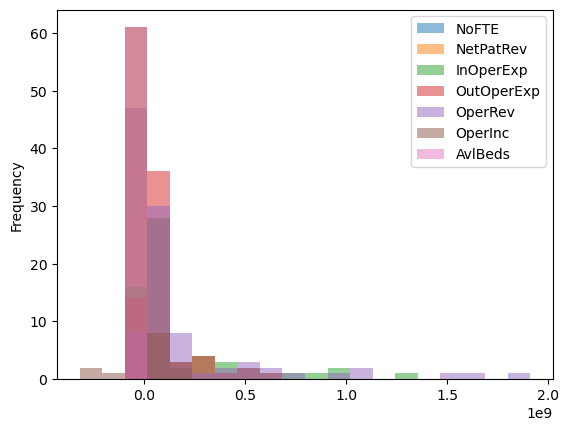

In [23]:
# create histogram using specified variables
new_merge_df[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']].plot.hist(alpha=0.5, bins=20)

<Axes: xlabel='AvlBeds', ylabel='NetPatRev'>

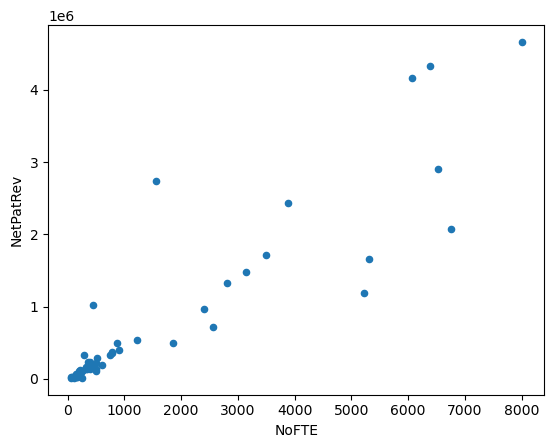

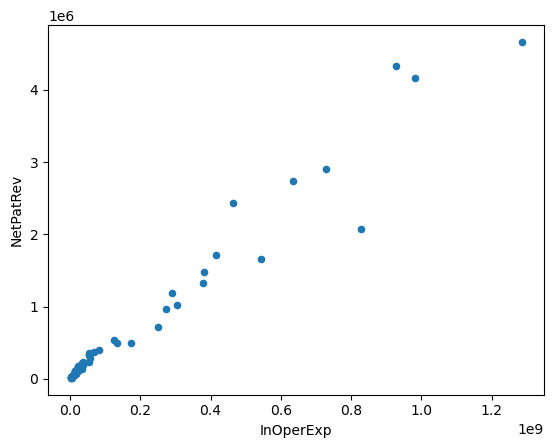

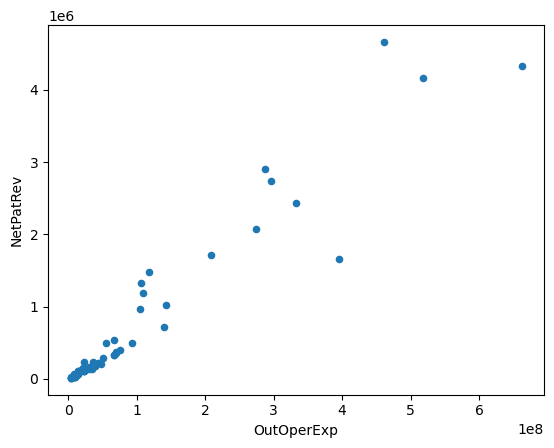

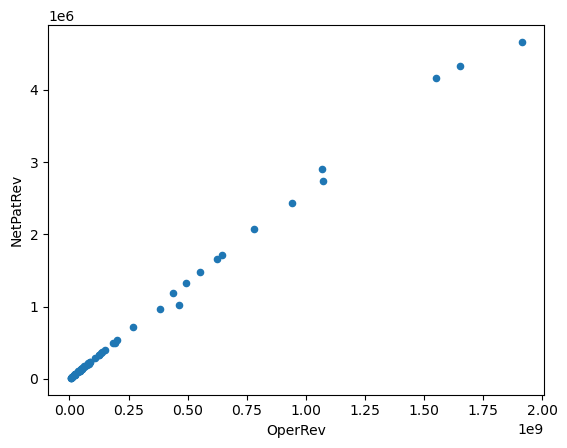

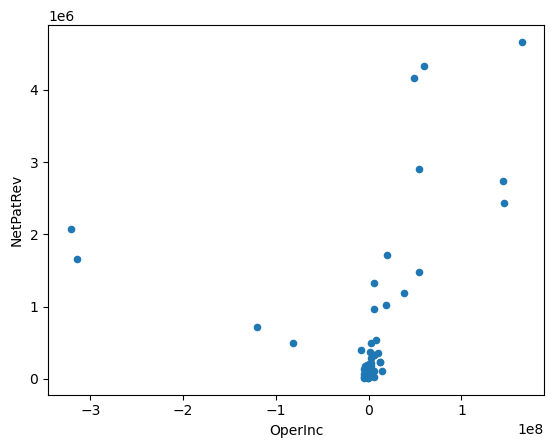

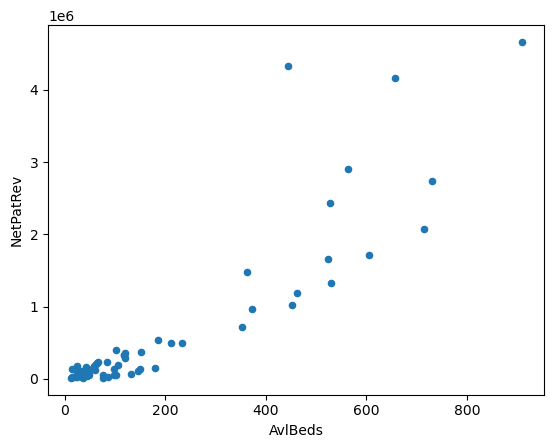

In [24]:
# create scatterplot based on specified information
new_merge_df.plot.scatter(x='NoFTE', y='NetPatRev')
new_merge_df.plot.scatter(x='InOperExp', y='NetPatRev')
new_merge_df.plot.scatter(x='OutOperExp', y='NetPatRev')
new_merge_df.plot.scatter(x='OperRev', y='NetPatRev')
new_merge_df.plot.scatter(x='OperInc', y='NetPatRev')
new_merge_df.plot.scatter(x='AvlBeds', y='NetPatRev')

#### Linearity
new_merge_df.plot.scatter(x='NoFTE', y='NetPatRev') # weak positive linear    
new_merge_df.plot.scatter(x='InOperExp', y='NetPatRev') # weak positive linear    
new_merge_df.plot.scatter(x='OutOperExp', y='NetPatRev') # weak positive linear    
new_merge_df.plot.scatter(x='OperRev', y='NetPatRev') # stong positive linear    
new_merge_df.plot.scatter(x='OperInc', y='NetPatRev') # non-linear    
new_merge_df.plot.scatter(x='AvlBeds', y='NetPatRev') # non-linear    

<Axes: >

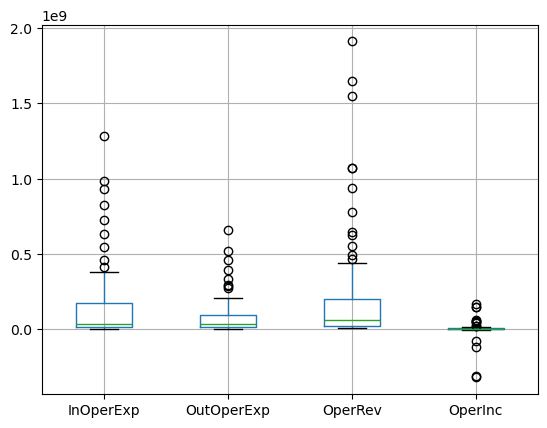

In [26]:
# create boxplot based on specified information
new_merge_df.loc[:,['InOperExp', 'OutOperExp', 'OperRev', 'OperInc']].boxplot()

<Axes: >

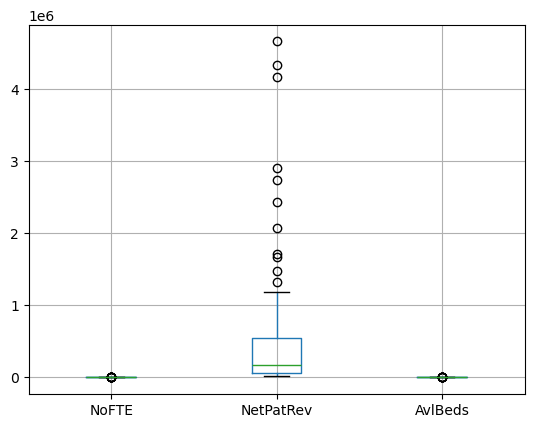

In [27]:
# create boxplot based on specified information
new_merge_df.loc[:,['NoFTE', 'NetPatRev', 'AvlBeds']].boxplot()

#### Boxplot Assessment
All boxplots have outliers as there are data points that lie above the horizontal bar. Although it appears to not be the case with NoFTE and AvlBeds they are squished so when you pull the boxplot by itself and bring it into greater focus you are able to see the data points that lie above the horizontal line.

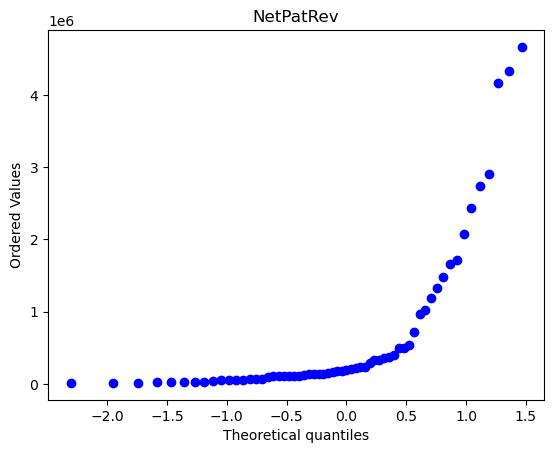

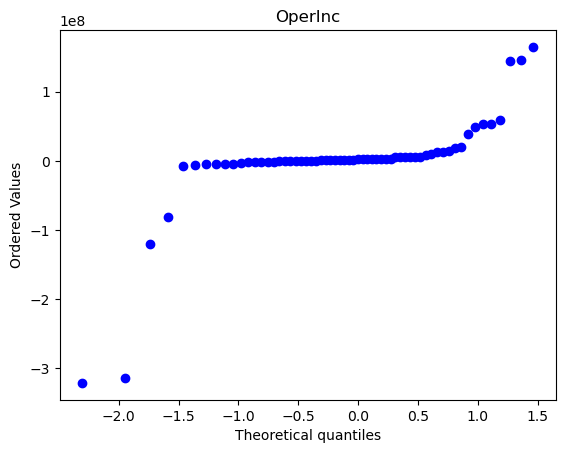

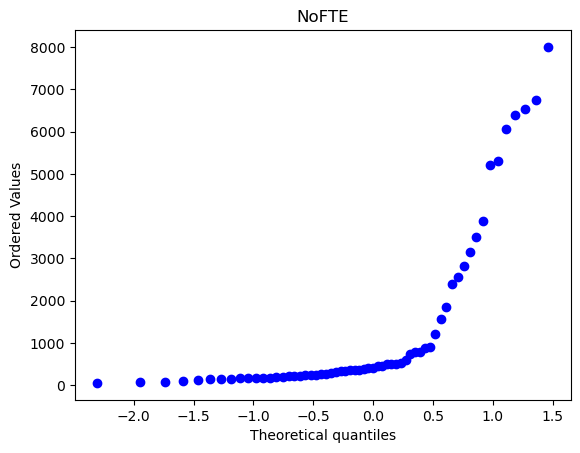

In [29]:
# create QQ plot NetPatRev
sts.probplot(new_merge_df['NetPatRev'], dist="norm", plot=plt)
plt.title('NetPatRev')
plt.show()

# create QQ plot OperInc
sts.probplot(new_merge_df['OperInc'], dist="norm", plot=plt)
plt.title('OperInc')
plt.show()

# create QQ plot NoFTE
sts.probplot(new_merge_df['NoFTE'], dist="norm", plot=plt)
plt.title('NoFTE')
plt.show()

In [30]:
# create SW test NetPatRev
netpatrev = new_merge_df['NetPatRev'].dropna()
sts.shapiro(netpatrev)

ShapiroResult(statistic=0.6234219025209827, pvalue=3.034105150816593e-11)

In [31]:
# create SW test OperInc
operinc = new_merge_df['OperInc'].dropna()
sts.shapiro(operinc)

ShapiroResult(statistic=0.559868520792415, pvalue=3.0240941892694677e-12)

In [32]:
# create SW test NoFTE
nofte = new_merge_df['NoFTE'].dropna()
sts.shapiro(nofte)

ShapiroResult(statistic=0.6450253278701603, pvalue=7.060430327919705e-11)

#### Shapiro Assessment
NetPatRev # confirms the data is not normally distributed as the p-value is below .05.    
OperInc # confirms the data is not normally distributed as the p-value is below .05.    
NoFTE # confirms the data is not normally distributed as the p-value is below .05.    